# Monte Carlo Study of Ferro-magnetism using an Ising Model


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/hariseldon99/StatMechCodes/blob/master/Metrop_Ising.ipynb)

The goal of this simulation is to run a statistical model simulating the evolution of magnetism as a function of material temperature. 
Since the emergence of magnetism is attributed to the contribution of a great many small atomic magnetic dipoles a statistical method is to be utilised.



### The Ising model
In 1925, Ernst Ising introduced a model consisting of a lattice of $N$ “spin” variables $s_i$, which can only take the values $\pm 1$. Every spin interacts with its nearest neighbors as well as with an external magnetic field $h$[1]. The Hamiltonian of the Ising model for a particular configuration of spins $\left\{s_i\right\}$ is
$$
H(\left\{s_i\right\}) = -\sum_{\langle i, j\rangle} s_is_j - h\sum_{i}s_i,
$$
where $\langle i, j\rangle$ denote only nearest neighbour pairs, or 'bonds'. Note that the hopping $J$ is set to unity, and $h$ (now in units of $J$) is an external field that interacts with each spin. Now, when kept completely isolated from the environment, the system wants to go to its lowest energy ground state. In the limit $h\rightarrow 0+$, this is the state with all the spins at $+1$, and in the limit $h\rightarrow 0-$, this is the state with all the spins at $-1$. However, connecting the system to a temperature bath and waiting for it to transition to thermal equilibrium causes thermal excitations that take it away from this trajectory. If the temperature is very high, we expect thermalization to dominate and all the spins to randomize when $h\rightarrow 0$, leading to a average magnetization  $m\equiv N^{-1}\sum_i s_i \approx 0$. However, this system might allow for *spontaneous magnetization* at lower temperatures, where interacting pairs of spins 'co-operate' and align themselves parallel to each other even if the external field $h$ vanishes. The purpose of this simulation is to demonstrate that this happens in the Ising model at least in some cases. 

An exact simulation of the full dynamics of the Ising model to its thermal equilibrium state is computationally prohibitive, since this requires computing the trajectory of $N$ spins through a total of $2^N$ possible states, which is too large for even super-computers to handle beyond $N\sim 40$. Therefore, we will have to start from a random configuration of spins and simulate the transition to equilibrium stochastically. This is done via **Monte Carlo methods**.
The subject of of this project will be statistical in nature, and hence a basic understanding of Monte Carlo methods and random number algorithms will be necessary.

## Monte Carlo Methods and the Ising model
Numerical computations which utilise random numbers are called Monte Carlo methods after a famous gambling hotspot in Monaco that used as a code word to denote the method, (at the time, the method was a military secret) [2]. The obvious applications of such methods are in stochastic physics: e.g., statistical thermodynamics. However, there are other, less obvious, applications including the evaluation of multi-dimensional integrals. The modern version of the Monte Carlo method was invented in the late 1940s by Stanislaw Ulam, and heavily influenced by Enrico Fermi, John von Neumann and Nicholas Metropolis [2].

Instead of a general discussion of Monte Carlo methods, we shall restrict our attention to a specific kind of monte carlo method calle the **Metropolis Algorithm**[3]. The Metropolis algorithm is a simple and widely used approach to generate the canonical ensemble in statistical mechanics. It is especially convenient to explain (and to implement) for an Ising model. The algorithm has the following steps.

1. Start with some spin configuration $\left\{s_i\right\}$.
2. Randomly choose a spin $s_i$
3. Attempt to flip it, *i.e.* $s_i \rightarrow − s_i$ (trial).
4. Compute the energy change $\Delta E$ and magnetization change $\Delta m$ due to this flip. This calculation will only involve the nearest neighbour spins.
    * If $\Delta E \leq 0$, accept the trial.
    * If $\Delta E > $ 0, accept the trial with probability $p \sim \exp{\left(-\beta\Delta E\right)}$.
5. If trial is rejected, put the spin back, *i.e.*: $s_i \rightarrow − s_i$
6. The above steps constitute one 'epoch' in the Monte Carlo method, analogous to a single unit of time passed. Calculate thermodynamic quantities summed over all the degrees of freedom.
7. Keep repeating these epochs until the thermodynamic quantities appear to stabilize in an orbit. That will be the thermal equilibrium point.

To see why this algorithm will cause the system to attain thermal equilibrium in a canonical ensemble, consider that this simulation follows a Markov Chain, which is completely specified by a transition probability matrix $\pi_{AB}$ — the probability of jumping to state B with a single spin-flip if the current state is A. During the runtime of the algorithm, a spin flip change with decreasing energy is always accepted, since this is a natural transition to the ground state. However, a spin flip with an increase energy is only accepted with probability $\exp{(-\beta\Delta E)}$, since this process is supposed to simulate the stochastic addition of thermal  energy from a bath at constant temperature $T=1/k_B\beta$. Consider any two states $A$ and $B$ such that $E_B > E_A$. If the acceptance probabilities  for a transition from state $A$ to state $B$ is $p^{acc}_{AB}$, then $\pi_{AB} \sim p^{acc}_{AB}$, and $\pi_{BA}\sim p^{acc}_{BA} $. Now, when the system is in equilibrium, we expect the principle of **detailed balance** to hold, where the probability from going from state $A$ to $B$ is the same as the probability of the reverse process *i.e.* going from $B$ to $A$ [3]. This way, all $A\rightarrow B$ transitions in an equilibrium orbit of the Metropolis dynamics cancel out with $B\rightarrow A$ transitions. Thus, at equilibrium,
$$
p_{A\rightarrow B} = p_A \pi_{AB} = p_{B\rightarrow A} = p_B\pi_{BA},
$$
where $p_{A,B}$ are the equilibrium probabilities of states $A$ and $B$ independently. Thus, 
$$
\frac{p_A}{p_B} = \frac{\pi_{BA}}{\pi_{AB}} = \frac{p^{acc}_{BA}}{p^{acc}_{AB}}.
$$
Finally, if our numerical algorithm chooses $p^{acc}_{AB} \sim e^{\beta\left(E_A - E_B\right)}$ and $p^{acc}_{BA} = 1$, then 
$$
\frac{p_A}{p_B} = \frac{1}{p^{acc}_{AB}} = e^{-\beta\left(E_A - E_B\right)} = \frac{e^{-\beta E_A}}{e^{-\beta E_B}}
$$
for all pairs of states $A$ and $B$. Therefore, $p_r\sim \exp{\left(-\beta E_r\right)}$ for any state $r$, which is the canonical ensemble.

## Numerical Implementation
The code cell below executes the Metropolis algorithm of the $1-$ and $2-$ dimensional Ising models. Instead of re-inventing the wheel, so to speak, we shall use a python routine designed by Hammel [4] after modifying it a little. The original source code [4] builds the Ising system and runs the monte carlo algorithm for $X$ monte carlo steps (referred to as 'epochs'). The basic code is just a loop, as represented in pseudocide below.


    system = build_system()

    for _ in range(epochs):

        N, M = generate_random_coordinate_location()

        E = calculate_energy_of_fliped_spin()
    
        if E <= 0.:     # Then this is a more probable state, flip the spin
            system[N,M] *= -1
        elif np.exp(-1./T*E) > np.random.rand():    # Still a possbile state, roll the dice
            system[N,M] *= -1
            
While the original code was designed for $2-$dimensional lattices only, we have added small modifications to handle both $1-$ and $2-$dimensional lattices.

## **TODO**

1. Add instructions below
2. Add exercises below

## References

1. Ising E. (1925), Z. Physik, **31**, 253 ; Also see Reichl, L. E. (2016), *A Modern Course in Statistical Physics*,  Wiley.

2. Metropolis, N. (1987). ["The beginning of the Monte Carlo method"](https://dasher.wustl.edu/chem478/reading/lascience-14-125-87.pdf). Los Alamos Science (1987 Special Issue dedicated to Stanislaw Ulam): 125–130.

3. Newman M. E. J., and Barkema G. T. (1999), *Monte Carlo Methods in Statistical Physics*, Clarendon Press.

4. Hammel B. D. (2017). [The Ising model](http://www.bdhammel.com/ising-model/), *[bdhammel.com](http://www.bdhammel.com/)*, June 10, 2017. Source code @ [GitHub](https://github.com/bdhammel/ising-model)

<!-- https://share.cocalc.com/share/bb76377ee6823f7155a629e6f072f30d7c0b956f/Project_IsingModel/Project_IsingModel.ipynb?viewer=share  -->

# Python codes
Below are the python codes for running the metropolis algorithm for the ising model.

## Define all functions
Run the code cell below to define all classes and functions. Extra packages also might be installed, if needed

In [6]:
# Changes by A. Roy @ https://github.com/StatMechCodes/Metrop_Ising.ipynb
!pip3 install tqdm
from functools import reduce
import numpy as np
import matplotlib.animation as anim
from tqdm import tqdm

#Credited to Alex McFarlane @ https://flipdazed.github.io/
class Periodic_Lattice(np.ndarray):
    """Creates an n-dimensional ring that joins on boundaries w/ numpy
    
    Required Inputs
        array :: np.array :: n-dim numpy array to use wrap with
    
    Only currently supports single point selections wrapped around the boundary
    """
    def __new__(cls, input_array, lattice_spacing=None):
        """__new__ is called by numpy when and explicit constructor is used:
        obj = MySubClass(params) otherwise we must rely on __array_finalize
         """
        # Input array is an already formed ndarray instance
        # We first cast to be our class type
        obj = np.asarray(input_array).view(cls)
        
        # add the new attribute to the created instance
        obj.lattice_shape = input_array.shape
        obj.lattice_dim = len(input_array.shape)
        obj.lattice_spacing = lattice_spacing
        
        # Finally, we must return the newly created object:
        return obj
    
    def __getitem__(self, index):
        index = self.latticeWrapIdx(index)
        return super(Periodic_Lattice, self).__getitem__(index)
    
    def __setitem__(self, index, item):
        index = self.latticeWrapIdx(index)
        return super(Periodic_Lattice, self).__setitem__(index, item)
    
    def __array_finalize__(self, obj):
        """ ndarray.__new__ passes __array_finalize__ the new object, 
        of our own class (self) as well as the object from which the view has been taken (obj). 
        See
        http://docs.scipy.org/doc/numpy/user/basics.subclassing.html#simple-example-adding-an-extra-attribute-to-ndarray
        for more info
        """
        # ``self`` is a new object resulting from
        # ndarray.__new__(Periodic_Lattice, ...), therefore it only has
        # attributes that the ndarray.__new__ constructor gave it -
        # i.e. those of a standard ndarray.
        #
        # We could have got to the ndarray.__new__ call in 3 ways:
        # From an explicit constructor - e.g. Periodic_Lattice():
        #   1. obj is None
        #       (we're in the middle of the Periodic_Lattice.__new__
        #       constructor, and self.info will be set when we return to
        #       Periodic_Lattice.__new__)
        if obj is None: return
        #   2. From view casting - e.g arr.view(Periodic_Lattice):
        #       obj is arr
        #       (type(obj) can be Periodic_Lattice)
        #   3. From new-from-template - e.g lattice[:3]
        #       type(obj) is Periodic_Lattice
        # 
        # Note that it is here, rather than in the __new__ method,
        # that we set the default value for 'spacing', because this
        # method sees all creation of default objects - with the
        # Periodic_Lattice.__new__ constructor, but also with
        # arr.view(Periodic_Lattice).
        #
        # These are in effect the default values from these operations
        self.lattice_shape = getattr(obj, 'lattice_shape', obj.shape)
        self.lattice_dim = getattr(obj, 'lattice_dim', len(obj.shape))
        self.lattice_spacing = getattr(obj, 'lattice_spacing', None)
        pass
    
    def latticeWrapIdx(self, index):
        """returns periodic lattice index 
        for a given iterable index
        
        Required Inputs:
            index :: iterable :: one integer for each axis
        
        This is NOT compatible with slicing
        """
        if not hasattr(index, '__iter__'): return index         # handle integer slices
        if len(index) != len(self.lattice_shape): return index  # must reference a scalar
        if any(type(i) == slice for i in index): return index   # slices not supported
        if len(index) == len(self.lattice_shape):               # periodic indexing of scalars
            mod_index = tuple(( (i%s + s)%s for i,s in zip(index, self.lattice_shape)))
            return mod_index
        raise ValueError('Unexpected index: {}'.format(index))

        
# Original code by B.D. Hammel @ https://github.com/bdhammel/ising-model
class IsingLattice:

    def __init__(self, temperature=1.0, field=0.0, max_epochs=10, initial_state=np.random.choice([-1, 1], size = (4,4))):
        """Build the system from an initial state
        Build either a randomly distributed system or a homogeneous system (for
        watching the deterioration of magnetization
        Parameters
        ----------
        temperature   : Provided in units where k_B = J = 1. Default = 1
        field         : External field in units of J. Default = 0.
        max_epochs    : The maximum number of monte carlo steps. Default = 100
        initial_state : numpy array with two axes. Any size or shape will do.
                        For 1d problems, choose a shape of (1,N) or (N,1). Default = random 4X4
        """
        if initial_state.ndim != 2:
            raise ValueError("Currently only 2d arrays (of any shape) are supported.\
                                            For For 1d problems, choose a shape of (1,N) or (N,1)")
        self.shape = initial_state.shape
        self.rows, self.cols = self.shape
        self.graph = np.meshgrid(np.arange(self.rows), np.arange(self.cols))
        self.size = np.prod(self.shape)
        self.T = temperature
        self.h = field
        self.max_epochs = max_epochs
        self.system = Periodic_Lattice(initial_state)
        #Initialize all thermodynamic data as functions of epoch (time) with blank lists
        self.epochdata = {"epochs":[], "mags":[], "chis":[], "energies":[], "cvs":[]}

    def energy(self, N, M):
        """Calculate the energy of spin interaction at a given lattice site
        i.e. the interaction of a Spin at lattice site n,m with its 4 neighbors
        - S_n,m*(S_n+1,m + Sn-1,m + S_n,m-1, + S_n,m+1)
        Parameters
        ----------
        N : int
            lattice site coordinate
        M : int
            lattice site coordinate
        Return
        ------
        float
            energy of the site
        """
        return -2*self.system[N, M]*(
            self.system[N - 1, M] + self.system[N + 1, M]
            + self.system[N, M - 1] + self.system[N, M + 1] + self.h 
        )

    @property
    def internal_energy(self):
        i, j = self.graph
        U = np.sum(self.energy(i, j).flatten())/self.size
        U_2 =  np.sum(self.energy(i, j).flatten()**2)/self.size
        return U, U_2

    @property
    def magnetization(self):
        """Find the average magnetization of the system
           Find the average mag^2 of the system also
        """
        m = np.sum(self.system)/self.size
        m_2 = np.sum(self.system**2)/self.size
        return m, m_2

    def metrop_gen(self):
        """Yield a generator for the metropolis simulation
        """
        for epoch in tqdm(np.arange(self.max_epochs)):
            # Randomly select a site on the lattice
            N, M = [np.random.randint(0, high=ndim) for ndim in self.shape]

            # Calculate energy of a flipped spin
            E = -1*self.energy(N, M)

            # "Roll the dice" to see if the spin is flipped
            if E <= 0.:
                self.system[N, M] *= -1
            elif np.exp(-E/self.T) > np.random.rand():
                self.system[N, M] *= -1
            #Calculate thermodynamic quantities
            m, msq = self.magnetization
            e, esq = self.internal_energy
            t = self.T
            tsq = t * t
            x = (msq - m*m)/t
            cv = (esq-e*e)/tsq

            #Update epochdata dict
            self.epochdata["epochs"].append(epoch)
            self.epochdata["mags"].append(m)
            self.epochdata["chis"].append(x)
            self.epochdata["energies"].append(e)
            self.epochdata["cvs"].append(cv)
            yield self 


#Prepare one frame of video for ising model simulation
def ising_video(lattice, plotter):
    #Get thermodynamics from continuously updated epochdata dict
    t = lattice.epochdata["epochs"]
    mags = lattice.epochdata["mags"]
    chis = lattice.epochdata["chis"]
    energies = lattice.epochdata["energies"]
    cvs = lattice.epochdata["cvs"]
    
    #Clear the plot of the previous frame and replot
    plotter.clf()
    # Get the figure and gridspec
    fig3 = plotter.gcf()
    grid = fig3.add_gridspec(4, 2)

    #Plot lattice on this axis
    lattice_ax = fig3.add_subplot(grid[0:,0])
    lattice_ax.axes.get_xaxis().set_visible(False)
    lattice_ax.axes.get_yaxis().set_visible(False)
    lattice_ax.imshow(lattice.system)

    #Plot thermodynamic quantities on these axes
    mags_ax = fig3.add_subplot(grid[0,1])
    mags_ax.set_title("m = %1.4lf" % mags[-1])
    mags_ax.axes.get_xaxis().set_visible(False)
    mags_ax.plot(t, mags)

    x_ax = fig3.add_subplot(grid[1,1])
    x_ax.set_title("X = %1.4lf" % chis[-1])
    x_ax.axes.get_xaxis().set_visible(False)
    x_ax.plot(t, chis)

    energy_ax = fig3.add_subplot(grid[2,1])
    energy_ax.set_title("e = %1.4lf" % energies[-1])
    energy_ax.axes.get_xaxis().set_visible(False)
    energy_ax.plot(t, energies)

    cv_ax = fig3.add_subplot(grid[3,1])
    cv_ax.set_title("Cv = %1.4lf" % cvs[-1])
    cv_ax.set_xlabel("t (mc steps)")
    cv_ax.plot(t, cvs)

#Run the actual metropolis algorithm
def ising_run(lattice, plotter,video=True, video_frate=60, **kwargs):
    """
    Runs the actual metropolis algorithm
    kwargs are matplotlib figure options.
    """
    if video:
        ani = anim.FuncAnimation(plotter.figure(**kwargs), ising_video, frames=lattice.metrop_gen, interval=1e3/video_frate, fargs=(plotter,))
    else:
        ani = None
        #This runs the lattice metropolis generator
        for lattice in lattice.metrop_gen():
            pass
    return ani

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


## Ising model in 1d

Run the code below to simulate Ising model in 2d.

100%|██████████| 50/50 [00:15<00:00,  3.25it/s]


  0%|          | 0/50 [00:00<?, ?it/s]


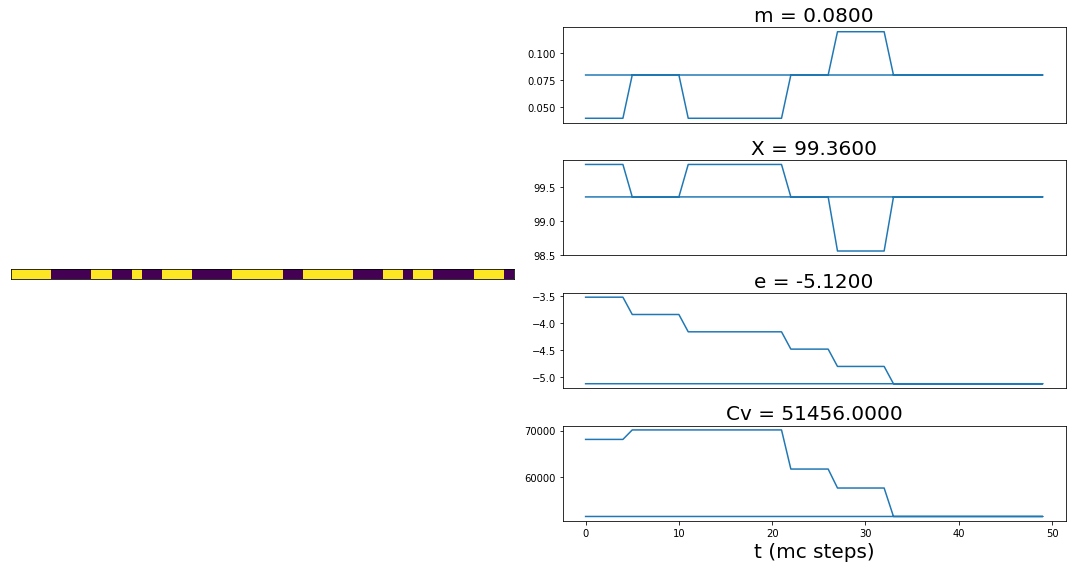

In [9]:
%matplotlib inline
from IPython.display import HTML
import matplotlib.pyplot as plt

#Size of fonts
fs = 20
plt.rcParams.update({'axes.titlesize': fs})
plt.rcParams.update({'axes.labelsize':fs})

#Size of figure
plt.rcParams.update({'figure.figsize':(15,8)})
plt.rcParams.update({'figure.autolayout':True})

#Simulation Parameters
lattice_shape = (1,50)
maxtime = 50
h = 0.0
temp = 1e-2

#Initial Condition (random)
ic = np.random.choice([-1, 1], size = lattice_shape)

#Initiate the Ising system with the parameters above
l = IsingLattice(initial_state=ic, temperature=temp, field=h, max_epochs=maxtime)

#Run and display the Ising animation
ani = ising_run(l, plt,video=True)
HTML(ani.to_jshtml(default_mode="once")) 

## Ising model in 2d

Run the code below to simulate Ising model in 2d.

100%|██████████| 50/50 [00:16<00:00,  2.99it/s]


  0%|          | 0/50 [00:00<?, ?it/s]


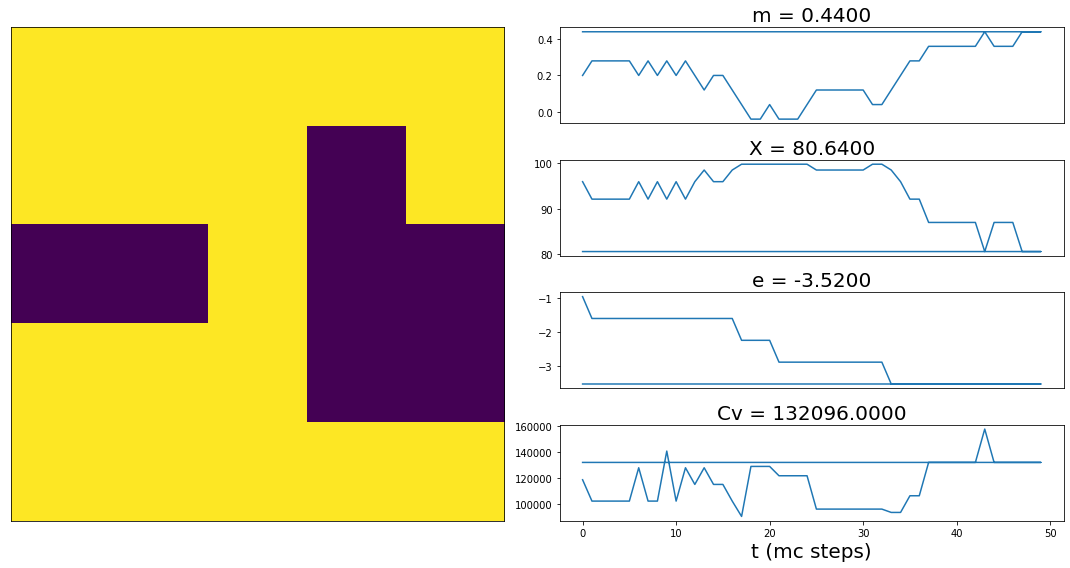

In [5]:
%matplotlib inline
from IPython.display import HTML
import matplotlib.pyplot as plt

#Size of fonts
fs = 20
plt.rcParams.update({'axes.titlesize': fs})
plt.rcParams.update({'axes.labelsize':fs})

#Size of figure
plt.rcParams.update({'figure.figsize':(15,8)})
plt.rcParams.update({'figure.autolayout':True})

#Simulation Parameters
lattice_shape = (5,5)
maxtime = 50
h = 0.0
temp = 1e-2

#Initial Condition (random)
ic = np.random.choice([-1, 1], size = lattice_shape)

#Initiate the Ising system with the parameters above
l = IsingLattice(initial_state=ic, temperature=temp, field=h, max_epochs=maxtime)

#Run and display the Ising animation
ani = ising_run(l, plt,video=True)
HTML(ani.to_jshtml(default_mode="once")) 

## Ising model without video

This runs ising model without video and displays only the end results

In [26]:
#Simulation Parameters
lattice_shape = (5,5)
maxtime = 50
h = -1.0
temp = 1e-2

#Initial Condition (random)
ic = np.random.choice([-1, 1], size = lattice_shape)

#Initiate the Ising system with the parameters above
l = IsingLattice(initial_state=ic, temperature=temp, field=h, max_epochs=maxtime)

#Run and display the Ising animation
ani = ising_run(l, None,video=False);

#Calculate thermodynamic quantities
m, msq = l.magnetization
e, esq = l.internal_energy
t = l.T
tsq = t * t
x = (msq - m*m)/t
cv = (esq-e*e)/tsq


result = {"Magnetization (M)":m, "Susceptibility (X)":x, "Energy (E)":e, "Specific Heat (Cv)":cv}
print("\n")
for k, v in result.items():
    print("%s = %2.4lf" % (k,v))

100%|██████████| 50/50 [00:00<00:00, 3203.03it/s]



Magnetization (M) = -0.7600
Susceptibility (X) = 42.2400
Energy (E) = -5.6800
Specific Heat (Cv) = 382976.0000
